[View in Colaboratory](https://colab.research.google.com/github/awenare/Fraud-Detection/blob/master/Fraud_Detection_Project_Tina_Kovacova.ipynb)

## Click Fraud Detection - Talking Data

**OVERVIEW: **

The objective is to predict whether a user will download an app after clicking a mobile app advertisement, as well as to discover fradulent clicks on ads. 

TalkingData, China’s largest independent big data service platform, covers over **70% of active mobile devices nationwide**. They handle **3 billion clicks per day, of which 90% are potentially fraudulent**. Their current approach to prevent click fraud for app developers is to **measure the journey of a user’s click across their portfolio, and flag IP addresses who produce lots of clicks, but never end up installing apps**. With this information, they've built an IP blacklist and device blacklist.

Methodology for Kaggle competition: [Area under the ROC Curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)

<br>

**FINDINGS: **


*   Out of the 100,000 samples in the test file, only 34,857 IP addresses are unique
*   The list contains 161 apps installed on 100 types of devices using 130 different OS variants
*   Logistic Regression already gives us a **0.998 accuracy** on the training and **0.997** on the testing sample.


<br>



**ISSUE TRACKER: **

✅ GitHub limits file upload to 100MB

✅ Git push/pull issues

⚠️ How to import dataset directly from HDD to colab?

⚠️ Upload to Google Drive (see old tutorials) for the 7+ GB full training data file

✅ How to do sorted count of the data by columns?

⚠️ Visualization for the data with no categorical labels (i.e. app name, device type, OS)

⚠️ 



📌 STRETCH: Better Data Cleanup

📌 STRETCH: Process this in Spark

### I. Loading the Dataset & Treating Data

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
data_sample = pd.read_csv('https://raw.githubusercontent.com/awenare/Fraud-Detection/master/train_sample.csv', index_col=None)

In [39]:
data_sample.head(5)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [40]:
data_sample.shape

(100000, 8)

In [47]:
unique = data_sample.groupby('is_attributed').nunique()
print(unique)

                  ip  app  device   os  channel  click_time  attributed_time  \
is_attributed                                                                  
0              34707  155      91  129      159       80218                0   
1                223   37      25   39       40         227              227   

               is_attributed  
is_attributed                 
0                          1  
1                          1  


#### Data Cleanup

In [41]:
# Identifying NaNs

pd.isnull(data_sample).sum()


ip                     0
app                    0
device                 0
os                     0
channel                0
click_time             0
attributed_time    99773
is_attributed          0
dtype: int64

In [42]:
# ⬇️ refactor with a pretty FOR loop?

pd.unique(data_sample['ip']).shape

(34857,)

In [43]:
pd.unique(data_sample['app']).shape

(161,)

In [44]:
pd.unique(data_sample['device']).shape

(100,)

In [45]:
pd.unique(data_sample['os']).shape

(130,)

In [46]:
pd.unique(data_sample['channel']).shape

(161,)

In [48]:
# Click time may or may not be potentially useful

pd.unique(data_sample['click_time']).shape

(80350,)

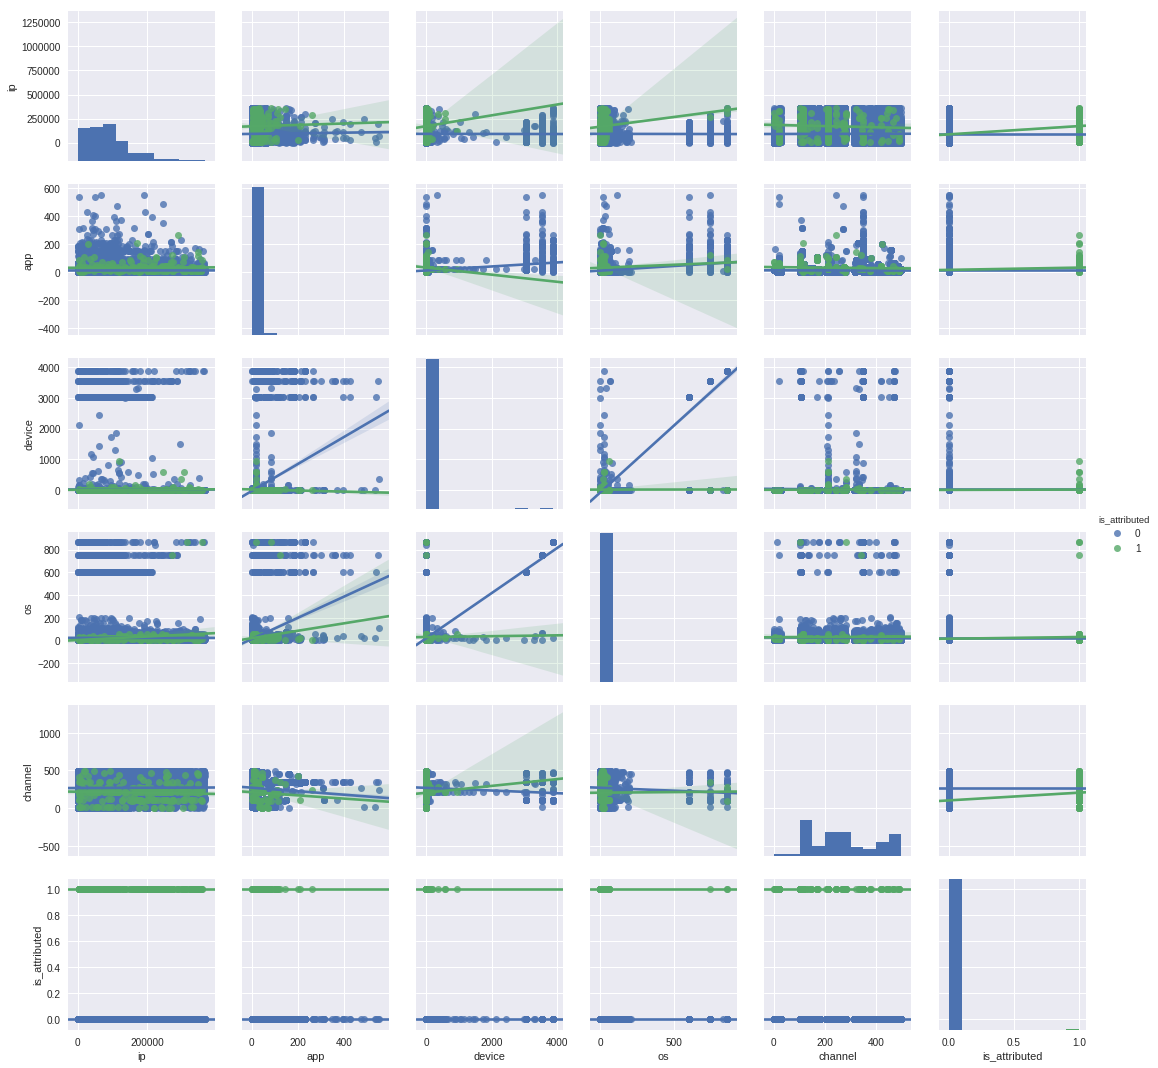

In [55]:
sns.pairplot(data_sample, hue='is_attributed', kind='reg')

In [50]:
print(data_sample['os'].duplicated().sum())

99870


### II. Fitting Initial Baseline Model: Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = data_sample[['app', 'device', 'os', 'channel']].as_matrix() 
# print(X)

Y = data_sample['is_attributed'].values  #.unique() # How to count them?
# print(Y)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

log_reg = LogisticRegression()
model = log_reg.fit(X_train, y_train)

# Accuracy Scores
print('Accuracy on the training: {:.3f}'.format(model.score(X_train, y_train)))
print('Accuracy on the testing subset: {:.3f}'.format(model.score(X_test, y_test)))

Accuracy on the training: 0.998
Accuracy on the testing subset: 0.997


### III. Models Comparison

The main models examined in this case will be

* RKDE: Robust Kernel Density Estimation
* OCSVM: One Class SVM
* LOF: Local Outlier Factor
* IFOR: Isolation Forest





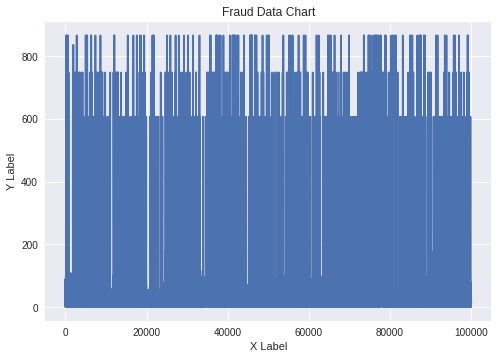

In [53]:
x_axis = data_sample[['os']]
y_axis = Y
plt.plot(x_axis) #, y_axis)

plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.title('Fraud Data Chart')
plt.grid(True)
plt.savefig("test.png")
plt.show()

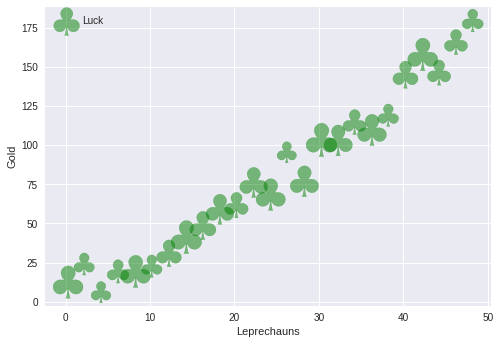

In [54]:
np.random.seed(1)


x = np.arange(0.0, 50.0, 2.0)
y = x ** 1.3 + np.random.rand(*x.shape) * 30.0
s = np.random.rand(*x.shape) * 800 + 500

plt.scatter(x, y, s, c="g", alpha=0.5, marker=r'$\clubsuit$',
            label="Luck")
plt.xlabel("Leprechauns")
plt.ylabel("Gold")
plt.legend(loc=2)
plt.show()

#### RKDE: Robust Kernel Density Estimation

#### OCSVM: One Class SVM

#### LOF: Local Outlier Factor

#### IFOR: Isolation Forest

### IV. Model Application

### V. Complete and Validated Analysis


### VI. Data Visualization